In [1]:
# load the required libraries 
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy import signal
import pulp as lp
import os
import h5py
# pandas is a python librarydedicated to data manipulation and analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor 
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import sklearn
from scipy.fft import rfft, rfftfreq, fft, fftfreq, fftshift

C:\Users\berka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\berka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 1. Preprocessing
<br>
<div style="text-align: justify;">
Preprocessing contains reading and visualizing the input data. There are 493 samples in the input data in the given scenario that has 23 columns representing the features and two columns representing the class label as string and integer respectively. Visualizing the input data as a distribution of classes according to the each feature can be seen below.
</div>

In [8]:
data = pd.read_csv("Data_with_number_labels.csv")
data

,IA_WALL_THICKNESS_AIRFOIL_C1,IA_WALL_THICKNESS_AIRFOIL_F2,IA_WALL_THICKNESS_AIRFOIL_K3,IA_WALL_THICKNESS_AIRFOIL_C5,IA_WALL_THICKNESS_AIRFOIL_F6,IA_WALL_THICKNESS_AIRFOIL_K7,IA_WALL_THICKNESS_AIRFOIL_C9,IA_WALL_THICKNESS_AIRFOIL_F10,IA_WALL_THICKNESS_AIRFOIL_K11,IA_WALL_THICKNESS_AIRFOIL_C12,...,IA_WALL_THICKNESS_AIRFOIL_C20,IA_WALL_THICKNESS_AIRFOIL_F21,IA_WALL_THICKNESS_AIRFOIL_K22,IA_WALL_THICKNESS_AIRFOIL_C23,IA_WALL_THICKNESS_AIRFOIL_D24,IA_WALL_THICKNESS_AIRFOIL_F25,IA_WALL_THICKNESS_AIRFOIL_H26,IA_WALL_THICKNESS_AIRFOIL_K27,Disposition,Labels_as_Integers
0,3.9,2.2,1.6,4.9,2.9,3.0,3.7,3.1,2.7,5.3,...,3.9,2.3,1.2,1.6,1.6,1.8,1.3,1.0,Use as is,0
1,4.0,2.2,1.3,4.1,2.4,1.9,3.5,2.5,2.0,6.0,...,4.2,3.0,2.2,1.7,1.7,1.8,1.7,1.5,Use as is,0
2,3.7,2.1,1.3,4.6,2.5,2.3,3.4,2.4,2.1,6.2,...,4.3,2.9,1.9,1.6,1.5,1.9,1.7,1.3,Use as is,0
3,4.1,2.3,1.2,4.6,2.5,1.8,3.6,2.7,2.0,4.9,...,4.5,3.1,2.4,2.0,1.8,2.1,1.7,1.8,Use as is,0
4,3.6,2.2,1.2,4.6,2.5,2.1,3.9,2.7,1.9,6.4,...,4.0,2.8,2.4,1.7,1.8,2.3,1.9,1.8,Use as is,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,4.3,2.3,1.3,4.7,2.6,2.0,3.5,2.6,2.1,5.2,...,3.9,2.4,1.9,1.6,1.4,1.5,1.2,1.4,Use as is,0
489,4.0,2.3,1.8,4.7,2.3,1.9,3.5,2.6,1.6,5.2,...,4.0,2.8,2.5,1.5,1.5,2.0,1.8,1.8,Use as is,0
490,4.7,3.6,3.0,5.4,3.7,3.4,4.0,3.2,3.2,4.6,...,3.6,2.2,1.4,1.6,1.5,1.7,1.1,0.9,Use as is,0
491,4.7,3.6,3.0,5.4,3.7,3.4,4.0,3.2,3.2,4.6,...,3.6,2.2,1.4,1.6,1.5,1.7,1.1,0.9,Use as is,0


In [9]:
Features= ["IA_WALL_THICKNESS_AIRFOIL_C1", "IA_WALL_THICKNESS_AIRFOIL_F2", "IA_WALL_THICKNESS_AIRFOIL_K3", "IA_WALL_THICKNESS_AIRFOIL_C5", "IA_WALL_THICKNESS_AIRFOIL_F6", "IA_WALL_THICKNESS_AIRFOIL_K7", "IA_WALL_THICKNESS_AIRFOIL_C9", "IA_WALL_THICKNESS_AIRFOIL_F10", "IA_WALL_THICKNESS_AIRFOIL_K11", "IA_WALL_THICKNESS_AIRFOIL_C12", "IA_WALL_THICKNESS_AIRFOIL_F13", "IA_WALL_THICKNESS_AIRFOIL_K14", "IA_WALL_THICKNESS_AIRFOIL_C16", "IA_WALL_THICKNESS_AIRFOIL_F17", "IA_WALL_THICKNESS_AIRFOIL_K18", "IA_WALL_THICKNESS_AIRFOIL_C20", "IA_WALL_THICKNESS_AIRFOIL_F21", "IA_WALL_THICKNESS_AIRFOIL_K22", "IA_WALL_THICKNESS_AIRFOIL_C23", "IA_WALL_THICKNESS_AIRFOIL_D24", "IA_WALL_THICKNESS_AIRFOIL_F25", "IA_WALL_THICKNESS_AIRFOIL_H26", "IA_WALL_THICKNESS_AIRFOIL_K27"]
Label= 'Labels_as_Integers'
X, y = data[Features].values, data[Label]
for n in range(0,22):
    print(f"Instant {str(n+1)}, \n  Features: {list(X[n])} \n  Label: {y[n]}")

Instant 1, 
  Features: [3.9, 2.2, 1.6, 4.9, 2.9, 3.0, 3.7, 3.1, 2.7, 5.3, 4.7, 3.1, 6.3, 4.5, 1.7, 3.9, 2.3, 1.2, 1.6, 1.6, 1.8, 1.3, 1.0] 
  Label: 0
Instant 2, 
  Features: [4.0, 2.2, 1.3, 4.1, 2.4, 1.9, 3.5, 2.5, 2.0, 6.0, 5.3, 3.3, 7.2, 5.0, 2.8, 4.2, 3.0, 2.2, 1.7, 1.7, 1.8, 1.7, 1.5] 
  Label: 0
Instant 3, 
  Features: [3.7, 2.1, 1.3, 4.6, 2.5, 2.3, 3.4, 2.4, 2.1, 6.2, 5.0, 3.4, 7.5, 4.6, 2.8, 4.3, 2.9, 1.9, 1.6, 1.5, 1.9, 1.7, 1.3] 
  Label: 0
Instant 4, 
  Features: [4.1, 2.3, 1.2, 4.6, 2.5, 1.8, 3.6, 2.7, 2.0, 4.9, 5.1, 3.5, 6.9, 4.5, 3.1, 4.5, 3.1, 2.4, 2.0, 1.8, 2.1, 1.7, 1.8] 
  Label: 0
Instant 5, 
  Features: [3.6, 2.2, 1.2, 4.6, 2.5, 2.1, 3.9, 2.7, 1.9, 6.4, 4.8, 3.7, 7.2, 5.2, 3.0, 4.0, 2.8, 2.4, 1.7, 1.8, 2.3, 1.9, 1.8] 
  Label: 0
Instant 6, 
  Features: [3.8, 2.2, 1.3, 4.5, 2.7, 2.4, 3.4, 2.5, 2.7, 5.9, 4.7, 3.2, 6.8, 4.4, 2.6, 4.1, 2.9, 1.6, 1.7, 1.7, 1.9, 1.3, 1.1] 
  Label: 0
Instant 7, 
  Features: [3.5, 1.9, 1.3, 4.4, 2.4, 1.9, 3.3, 2.3, 2.4, 6.0, 5.1, 3.7, 6.5

C:\Users\berka\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


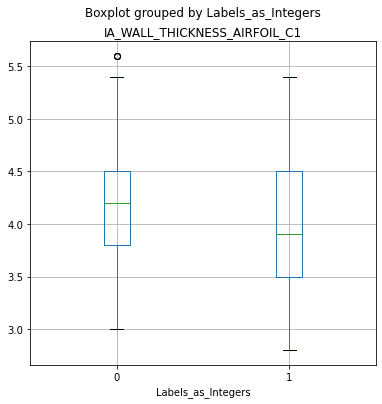

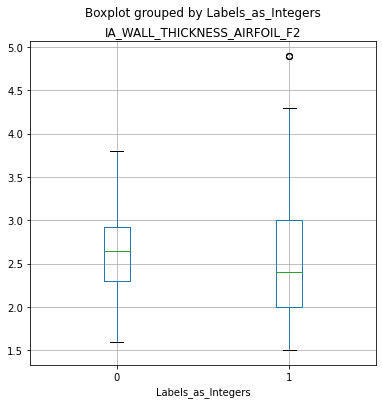

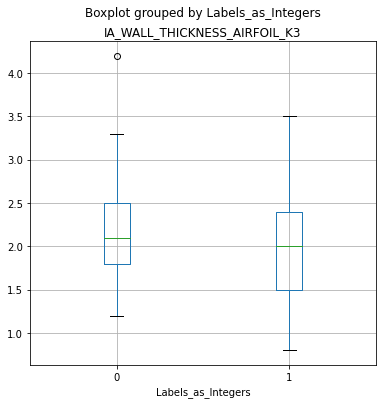

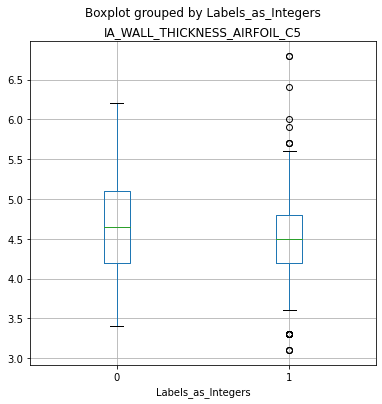

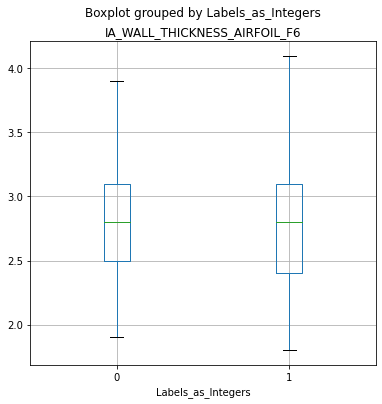

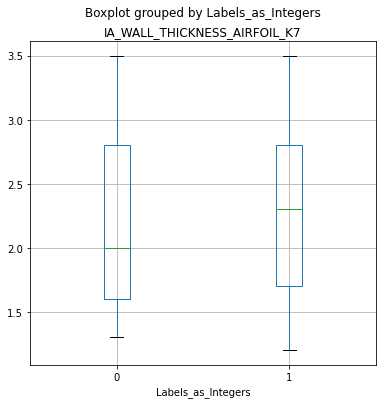

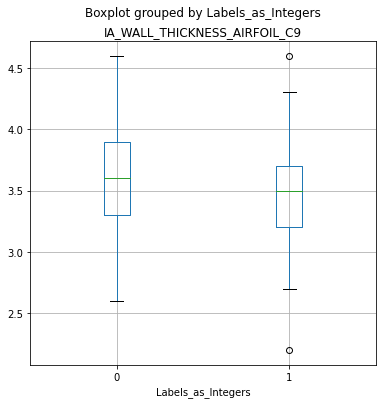

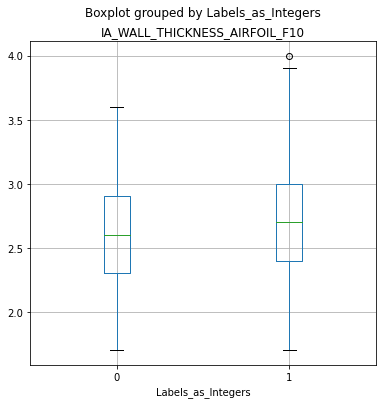

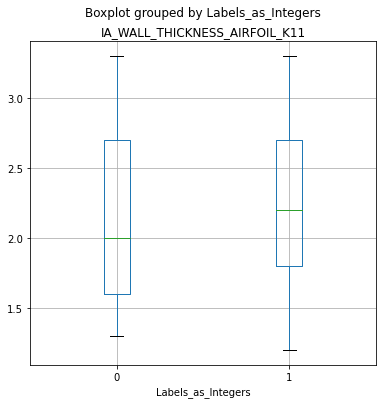

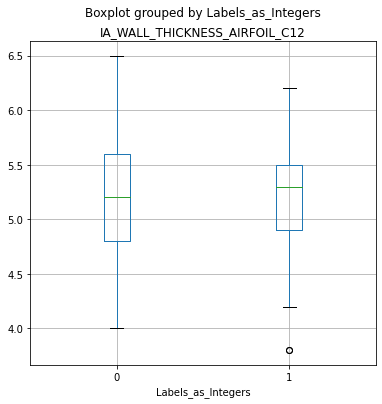

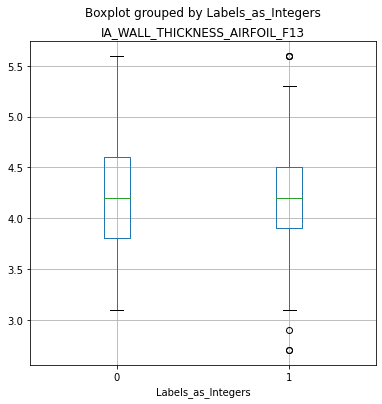

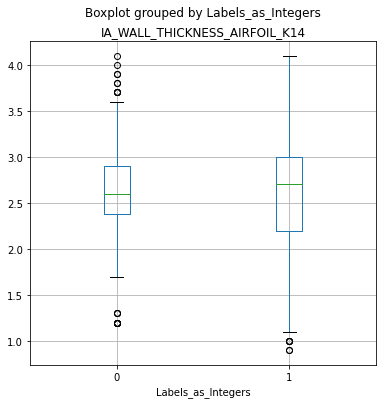

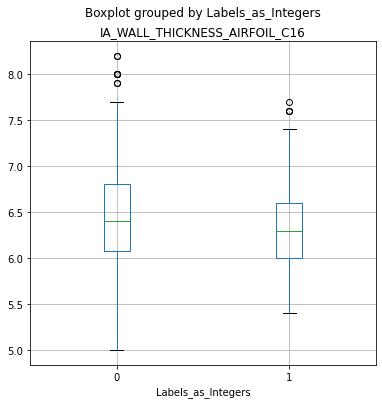

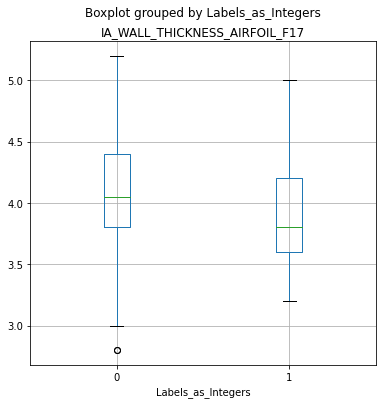

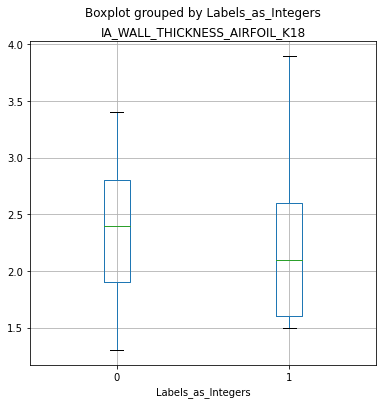

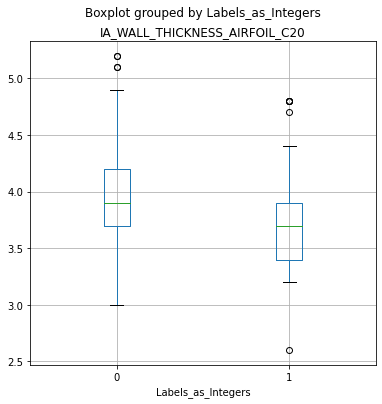

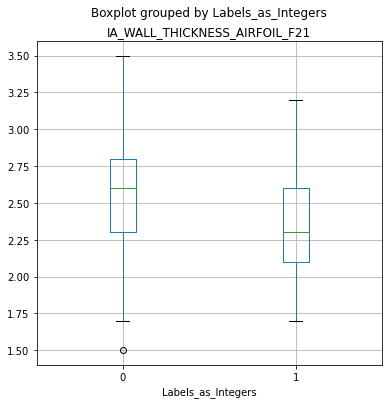

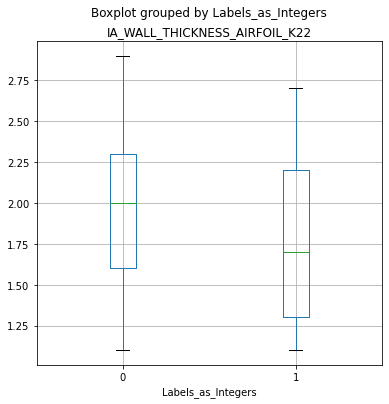

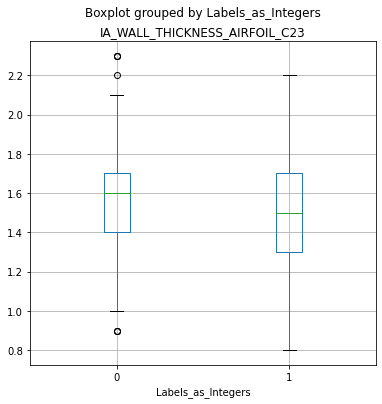

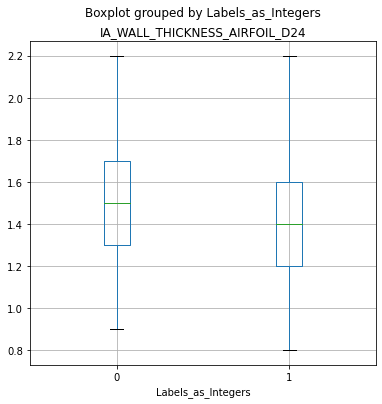

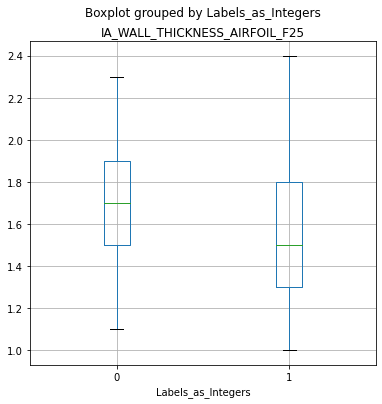

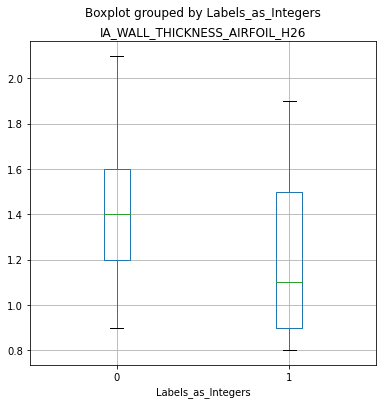

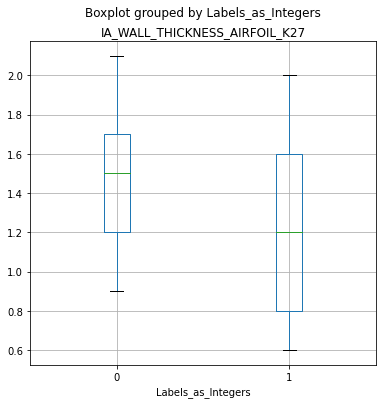

In [10]:
for col in Features:
    data.boxplot(column=col, by='Labels_as_Integers', figsize=(6,6))
    plt.title(col)
plt.show()

# 2.Training
<br>
<div style="text-align: justify;">
The training of the models includes following key-points: <br>
- Defining the structure of both NN models with and without domain knowledge, <br>
- Defining the custom loss function where the domain knowledge for the given scenario is defined and will be integrated into the process as an additional loss term, <br>
- A grid search for determining the optimal model parameters being the coefficients in the custom loss function for the given available training data quantity, <br>
- Traning of models. <br>

The results of the trainings can be observed at the end as a graph of training loss under epochs and as an accuracy score of both models. In the graph, it should be expected that the loss of the model with domain knowledge must have at least as much as the other one, because a penalty will be added in case of constraint violation.
</div>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
y_test = y_test.values.reshape(-1,1)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')
y_train

X_train: (394, 23) 
X_test: (99, 23) 
y_train: (394,) 
y_test: (99, 1)


6      0
407    0
108    0
186    1
297    0
      ..
323    0
192    1
117    0
47     0
172    0
Name: Labels_as_Integers, Length: 394, dtype: int64

## 2.1. Model without domain knowledge
### 2.2.1. Defining Constraints
<br>
<div style="text-align: justify;">
    The model without domain knowledge has a structure of a hidden layer with 128 neurons and an activation function RELU, and a output layer with an activation function of sigmoid. Since there is not much data available, a model with a more complex structure could lead to an overfitting. Therefore, the structure of both models is same. Furthermore, the loss function is defined below the model and has only the binary cross entropy the model without domain knowledge.
</div>

In [12]:
standard_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(len(Features),)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])


def custom_loss_standard_model(y_true, y_pred, x):
    
    binary_crossentropy_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    
    return binary_crossentropy_loss

# Compile the model
standard_model.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_loss_standard_model(y_true, y_pred, X_train), metrics=['accuracy'])

In [13]:
# Train the standard model
hist_standard_model= standard_model.fit(X_train, y_train, epochs=500, batch_size=3, validation_split=0.1)

Epoch 1/500
118/118 [==============================] - 0s 975us/step - loss: 0.6193 - accuracy: 0.6836 - val_loss: 0.5749 - val_accuracy: 0.7000
Epoch 2/500
118/118 [==============================] - 0s 565us/step - loss: 0.6525 - accuracy: 0.6695 - val_loss: 0.5709 - val_accuracy: 0.7000
Epoch 3/500
118/118 [==============================] - 0s 548us/step - loss: 0.5644 - accuracy: 0.7316 - val_loss: 0.5520 - val_accuracy: 0.7000
Epoch 4/500
118/118 [==============================] - 0s 565us/step - loss: 0.6047 - accuracy: 0.7232 - val_loss: 0.5670 - val_accuracy: 0.7750
Epoch 5/500
118/118 [==============================] - 0s 565us/step - loss: 0.5815 - accuracy: 0.7147 - val_loss: 0.5388 - val_accuracy: 0.7000
Epoch 6/500
118/118 [==============================] - 0s 573us/step - loss: 0.5663 - accuracy: 0.7203 - val_loss: 0.6542 - val_accuracy: 0.7000
Epoch 7/500
118/118 [==============================] - 0s 565us/step - loss: 0.5542 - accuracy: 0.7373 - val_loss: 0.6077 - val_ac

118/118 [==============================] - 0s 573us/step - loss: 0.4597 - accuracy: 0.7797 - val_loss: 0.3604 - val_accuracy: 0.8750
Epoch 58/500
118/118 [==============================] - 0s 633us/step - loss: 0.4313 - accuracy: 0.7966 - val_loss: 0.3509 - val_accuracy: 0.8250
Epoch 59/500
118/118 [==============================] - 0s 565us/step - loss: 0.4390 - accuracy: 0.7966 - val_loss: 0.4629 - val_accuracy: 0.7500
Epoch 60/500
118/118 [==============================] - 0s 548us/step - loss: 0.4669 - accuracy: 0.7712 - val_loss: 0.3576 - val_accuracy: 0.8250
Epoch 61/500
118/118 [==============================] - 0s 556us/step - loss: 0.4442 - accuracy: 0.7712 - val_loss: 0.4181 - val_accuracy: 0.7500
Epoch 62/500
118/118 [==============================] - 0s 539us/step - loss: 0.4289 - accuracy: 0.8023 - val_loss: 0.5016 - val_accuracy: 0.7250
Epoch 63/500
118/118 [==============================] - 0s 556us/step - loss: 0.4363 - accuracy: 0.7881 - val_loss: 0.4024 - val_accuracy

118/118 [==============================] - 0s 565us/step - loss: 0.3910 - accuracy: 0.8107 - val_loss: 0.3932 - val_accuracy: 0.8500
Epoch 114/500
118/118 [==============================] - 0s 548us/step - loss: 0.3979 - accuracy: 0.8051 - val_loss: 0.3679 - val_accuracy: 0.8250
Epoch 115/500
118/118 [==============================] - 0s 548us/step - loss: 0.3946 - accuracy: 0.8136 - val_loss: 0.3728 - val_accuracy: 0.8250
Epoch 116/500
118/118 [==============================] - 0s 582us/step - loss: 0.3971 - accuracy: 0.8023 - val_loss: 0.3141 - val_accuracy: 0.8250
Epoch 117/500
118/118 [==============================] - 0s 573us/step - loss: 0.3703 - accuracy: 0.8588 - val_loss: 0.3302 - val_accuracy: 0.8500
Epoch 118/500
118/118 [==============================] - 0s 565us/step - loss: 0.3881 - accuracy: 0.8305 - val_loss: 0.3708 - val_accuracy: 0.8250
Epoch 119/500
118/118 [==============================] - 0s 573us/step - loss: 0.3823 - accuracy: 0.8277 - val_loss: 0.5394 - val_ac

Epoch 169/500
118/118 [==============================] - 0s 582us/step - loss: 0.3667 - accuracy: 0.8305 - val_loss: 0.4048 - val_accuracy: 0.8250
Epoch 170/500
118/118 [==============================] - 0s 590us/step - loss: 0.3649 - accuracy: 0.8305 - val_loss: 0.3265 - val_accuracy: 0.8750
Epoch 171/500
118/118 [==============================] - 0s 573us/step - loss: 0.3580 - accuracy: 0.8588 - val_loss: 0.3492 - val_accuracy: 0.8500
Epoch 172/500
118/118 [==============================] - 0s 560us/step - loss: 0.3710 - accuracy: 0.8277 - val_loss: 0.3263 - val_accuracy: 0.8500
Epoch 173/500
118/118 [==============================] - 0s 556us/step - loss: 0.3768 - accuracy: 0.8390 - val_loss: 0.4744 - val_accuracy: 0.7750
Epoch 174/500
118/118 [==============================] - 0s 548us/step - loss: 0.3374 - accuracy: 0.8418 - val_loss: 0.3530 - val_accuracy: 0.8250
Epoch 175/500
118/118 [==============================] - 0s 539us/step - loss: 0.3422 - accuracy: 0.8616 - val_loss: 0

Epoch 225/500
118/118 [==============================] - 0s 565us/step - loss: 0.3789 - accuracy: 0.8305 - val_loss: 0.3371 - val_accuracy: 0.8500
Epoch 226/500
118/118 [==============================] - 0s 547us/step - loss: 0.3309 - accuracy: 0.8644 - val_loss: 0.4794 - val_accuracy: 0.7750
Epoch 227/500
118/118 [==============================] - 0s 539us/step - loss: 0.3547 - accuracy: 0.8531 - val_loss: 0.4029 - val_accuracy: 0.8000
Epoch 228/500
118/118 [==============================] - 0s 573us/step - loss: 0.3339 - accuracy: 0.8362 - val_loss: 0.3352 - val_accuracy: 0.8250
Epoch 229/500
118/118 [==============================] - 0s 582us/step - loss: 0.3163 - accuracy: 0.8644 - val_loss: 0.3534 - val_accuracy: 0.8000
Epoch 230/500
118/118 [==============================] - 0s 599us/step - loss: 0.3494 - accuracy: 0.8531 - val_loss: 0.3757 - val_accuracy: 0.8250
Epoch 231/500
118/118 [==============================] - 0s 573us/step - loss: 0.3243 - accuracy: 0.8757 - val_loss: 0

Epoch 281/500
118/118 [==============================] - 0s 548us/step - loss: 0.2929 - accuracy: 0.8672 - val_loss: 0.3654 - val_accuracy: 0.8250
Epoch 282/500
118/118 [==============================] - 0s 548us/step - loss: 0.2993 - accuracy: 0.8616 - val_loss: 0.2847 - val_accuracy: 0.9000
Epoch 283/500
118/118 [==============================] - 0s 548us/step - loss: 0.2928 - accuracy: 0.8814 - val_loss: 0.4060 - val_accuracy: 0.8500
Epoch 284/500
118/118 [==============================] - 0s 548us/step - loss: 0.2943 - accuracy: 0.8870 - val_loss: 0.3725 - val_accuracy: 0.8250
Epoch 285/500
118/118 [==============================] - 0s 539us/step - loss: 0.3034 - accuracy: 0.8757 - val_loss: 0.3630 - val_accuracy: 0.8750
Epoch 286/500
118/118 [==============================] - 0s 548us/step - loss: 0.3463 - accuracy: 0.8531 - val_loss: 0.3240 - val_accuracy: 0.8750
Epoch 287/500
118/118 [==============================] - 0s 539us/step - loss: 0.3386 - accuracy: 0.8588 - val_loss: 0

Epoch 337/500
118/118 [==============================] - 0s 539us/step - loss: 0.2732 - accuracy: 0.8983 - val_loss: 0.2368 - val_accuracy: 0.9000
Epoch 338/500
118/118 [==============================] - 0s 548us/step - loss: 0.2801 - accuracy: 0.8814 - val_loss: 0.3891 - val_accuracy: 0.8500
Epoch 339/500
118/118 [==============================] - 0s 556us/step - loss: 0.2758 - accuracy: 0.8870 - val_loss: 0.2799 - val_accuracy: 0.8750
Epoch 340/500
118/118 [==============================] - 0s 548us/step - loss: 0.3106 - accuracy: 0.8814 - val_loss: 0.2496 - val_accuracy: 0.8750
Epoch 341/500
118/118 [==============================] - 0s 548us/step - loss: 0.2488 - accuracy: 0.9011 - val_loss: 0.2877 - val_accuracy: 0.8750
Epoch 342/500
118/118 [==============================] - 0s 543us/step - loss: 0.2705 - accuracy: 0.8785 - val_loss: 0.3154 - val_accuracy: 0.8750
Epoch 343/500
118/118 [==============================] - 0s 539us/step - loss: 0.2881 - accuracy: 0.8814 - val_loss: 0

Epoch 393/500
118/118 [==============================] - 0s 573us/step - loss: 0.2504 - accuracy: 0.9209 - val_loss: 0.2824 - val_accuracy: 0.8750
Epoch 394/500
118/118 [==============================] - 0s 539us/step - loss: 0.2594 - accuracy: 0.9096 - val_loss: 0.3710 - val_accuracy: 0.8000
Epoch 395/500
118/118 [==============================] - 0s 539us/step - loss: 0.2738 - accuracy: 0.8842 - val_loss: 0.4631 - val_accuracy: 0.8000
Epoch 396/500
118/118 [==============================] - 0s 548us/step - loss: 0.2656 - accuracy: 0.8927 - val_loss: 0.2252 - val_accuracy: 0.9000
Epoch 397/500
118/118 [==============================] - 0s 556us/step - loss: 0.2781 - accuracy: 0.8842 - val_loss: 0.2979 - val_accuracy: 0.8500
Epoch 398/500
118/118 [==============================] - 0s 548us/step - loss: 0.2575 - accuracy: 0.9068 - val_loss: 0.3631 - val_accuracy: 0.8000
Epoch 399/500
118/118 [==============================] - 0s 556us/step - loss: 0.2881 - accuracy: 0.8785 - val_loss: 0

Epoch 449/500
118/118 [==============================] - 0s 565us/step - loss: 0.2458 - accuracy: 0.8898 - val_loss: 0.2633 - val_accuracy: 0.8750
Epoch 450/500
118/118 [==============================] - 0s 539us/step - loss: 0.2553 - accuracy: 0.9096 - val_loss: 0.2358 - val_accuracy: 0.9000
Epoch 451/500
118/118 [==============================] - 0s 590us/step - loss: 0.2431 - accuracy: 0.9040 - val_loss: 0.2802 - val_accuracy: 0.9000
Epoch 452/500
118/118 [==============================] - 0s 599us/step - loss: 0.2238 - accuracy: 0.9153 - val_loss: 0.2205 - val_accuracy: 0.9250
Epoch 453/500
118/118 [==============================] - 0s 582us/step - loss: 0.2551 - accuracy: 0.8927 - val_loss: 0.2555 - val_accuracy: 0.9000
Epoch 454/500
118/118 [==============================] - 0s 556us/step - loss: 0.2301 - accuracy: 0.9181 - val_loss: 0.3160 - val_accuracy: 0.8750
Epoch 455/500
118/118 [==============================] - 0s 548us/step - loss: 0.2529 - accuracy: 0.8983 - val_loss: 0

## 2.2. Model with domain knowledge
<br>
<div style="text-align: justify;">
    This step is followed by defining the constraints as the step for integrating the domain knowledge, a grid search for optimal parameters, defining the model with domain knowledge and optimal parameters found in the grid search, and training the model.
</div>

### 2.2.1. Defining Constraints
<br>
<div style="text-align: justify;">
    The domain knowledge is defined as soft constraints meaning that a violation of a constraint will end up with penalizing the model in the loss function. There are a total of 32 conditions, representing cases where the sample should be labeled as "scrap" and in this case "1" as integer class. The conditions are binded with a logical or at the end of the custom loss function. That means that any satisfied condition makes the sample "scrap". The constraint loss is increased only if the prediction of the model does not match with the result of logical or operator. Otherwise, none will be added into the constraint loss.
</div>

In [14]:
def custom_loss(y_true, y_pred, x, model_constant, constraints_constant):
    
    """
    Custom loss function for integration of domain knowledge as an additional term into the loss function.
    
    Args:
        y_true: true labels
        y_pred: model predictions
        x: input data
        model_constant: coefficient of the model loss in the loss function
        constraints_constant: coefficient of the constraint loss in the loss function
    
    Returns:
        total loss: model_constant*model_loss + constraints_constant*constraint_loss
    """
    
    # Compute the binary cross-entropy loss
    binary_crossentropy_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    
    # Thresholds
    threshold1 = -0.2 # for measure points (1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21)
    threshold2 = -0.3 # for measure points (7, 18)
    threshold3 = -0.4 # for measure point 22
    threshold4 = 0.0 # for measure points (23, 24, 25, 26, 27)
    threshold5 = 0.0 # for pair measure points

    # Measure points
    measure_point_1 = x[:, 0]
    measure_point_2 = x[:, 1]
    measure_point_3 = x[:, 2]
    measure_point_5 = x[:, 3]
    measure_point_6 = x[:, 4]
    measure_point_7 = x[:, 5]
    measure_point_9 = x[:, 6]
    measure_point_10 = x[:, 7]
    measure_point_11 = x[:, 8]
    measure_point_12 = x[:, 9]
    measure_point_13 = x[:, 10]
    measure_point_14 = x[:, 11]
    measure_point_16 = x[:, 12]
    measure_point_17 = x[:, 13]
    measure_point_18 = x[:, 14]
    measure_point_20 = x[:, 15]
    measure_point_21 = x[:, 16]
    measure_point_22 = x[:, 17]
    measure_point_23 = x[:, 18]
    measure_point_24 = x[:, 19]
    measure_point_25 = x[:, 20]
    measure_point_26 = x[:, 21]
    measure_point_27 = x[:, 22]

    # The constraint loss at the beginning
    constraint_loss= 0

    # Binary representation of the model prediction
    model_prediction= tf.where(y_pred >= 0.5, 1.0, 0.0)
    
    #--------------------------------- Constraints with the first threshold ------------------------------------

    # First constraint condition
    # Condition 1: When the measure point 1 is after the subtraction still less than threshhold value, the class should be assigned as 1 (Scrap)
    condition1 = (measure_point_1 - 3.2 < threshold1)

    # Second constraint condition
    condition2 = (measure_point_2 - 1.8 < threshold1)

    # Third constraint condition
    condition3 = (measure_point_3 - 1.4 < threshold1)

    # Fourth constraint condition
    condition4 = (measure_point_5 - 3.6 < threshold1)

    # Fifth constraint condition
    condition5 = (measure_point_6 - 2.1 < threshold1)

    # Seventh constraint condition
    condition7 = (measure_point_9 - 2.7 < threshold1)
    
    # Eighth constraint condition
    condition8 = (measure_point_10 - 1.9 < threshold1)
    
    # Nineth constraint condition
    condition9 = (measure_point_11 - 1.7 < threshold1)
    
    # Tenth constraint condition
    condition10 = (measure_point_12 - 4.2 < threshold1)
    
    # Eleventh constraint condition
    condition11 = (measure_point_13 - 2.6 < threshold1)
    
    # Twelveth constraint condition
    condition12 = (measure_point_14 - 1.4 < threshold1)
    
    # Thirteenth constraint condition
    condition13 = (measure_point_16 - 5.2 < threshold1)
    
    # Fourteenth constraint condition
    condition14 = (measure_point_17 - 2.9 < threshold1)
    
    # Sixteenth constraint condition
    condition16 = (measure_point_20 - 2.9 < threshold1)
    
    # Seventeenth constraint condition
    condition17 = (measure_point_21 - 1.7 < threshold1)
    
    # ------------------------------ Constraints with the second threshold --------------------------------

    # Sixth constraint condition
    condition6 = (measure_point_7 - 1.6 < threshold2)
    
    # Fifteenth constraint condition
    condition15 = (measure_point_18 - 1.6 < threshold2)

    # ------------------------------ Constraints with the third threshold --------------------------------

    # Eighteenth constraint condition
    condition18 = (measure_point_22 - 1.3 < threshold3)
    
    # ------------------------------ Constraints with the fourth threshold --------------------------------

    # Nineteenth constraint condition
    condition19 = (measure_point_23 - 0.9 < threshold4)
    
    # Twentieth constraint condition
    condition20 = (measure_point_24 - 0.9 < threshold4)
    
    # Twenty-first constraint condition
    condition21 = (measure_point_25 - 0.9 < threshold4)
    
    # Twenty-second constraint condition
    condition22 = (measure_point_26 - 0.9 < threshold4)
    
    # Twenty-third constraint condition
    condition23 = (measure_point_27 - 0.9 < threshold4)
    # ------------------------------ Constraints with the fifth threshold --------------------------------

    # Twenty-forth (opposite) constraint
    condition24 = (measure_point_1 - 3.2 + measure_point_12 - 4.20 < threshold5)
    
    # Twenty-fifth (opposite) constraint
    condition25 = (measure_point_2 - 1.8 + measure_point_13 - 2.6 < threshold5)
    
    # Twenty-sixth (opposite) constraint
    condition26 = (measure_point_3 - 1.4 + measure_point_14 - 1.4 < threshold5)
    
    # Twenty-seventh (opposite) constraint
    condition27 = (measure_point_5 - 3.6 + measure_point_16 - 5.2 < threshold5)
    
    # Twenty-eighth (opposite) constraint
    condition28 = (measure_point_6 - 1.8 + measure_point_17 - 2.9 < threshold5)
    
    # Twenty-nineth (opposite) constraint
    condition29 = (measure_point_7 - 1.4 + measure_point_18 - 1.6 < threshold5)
    
    # Thirtieth (opposite) constraint
    condition30 = (measure_point_9 - 2.7 + measure_point_20 - 2.9 < threshold5)
    
    # Thirty-first (opposite) constraint
    condition31 = (measure_point_10 - 1.9 + measure_point_21 - 1.7 < threshold5)
    
    # Thirty-second (opposite) constraint
    condition32 = (measure_point_11 - 1.7 + measure_point_22 - 1.3 < threshold5)
    
    # The result of the combined condition can be either true (1) representing "scrap" or false (0) representing "use as is"
    combined_condition = np.logical_or.reduce([condition1, condition2, condition3, condition4, condition5, \
                                                   condition6, condition7, condition8, condition9, condition10, \
                                                   condition11, condition12, condition13, condition14, condition15, \
                                                   condition16, condition17, condition18, condition19, condition20, \
                                                   condition21, condition22, condition23,condition24, condition25, condition26, condition27, \
                                     condition28, condition29, condition30, condition31, condition32])
    
    # Checking for the class 1, whether the prediction coincides with the result of the logical or operator.
    # logical_and makes an and-binding between the combined_condition and the condition y_pred>=0.5. If both are 1, then none will be added.
    # Otherwise 1.
    constraint_loss += tf.reduce_mean(tf.where(
        tf.logical_and(combined_condition, y_pred >= 0.5), 0.0, 1.0
        ))
    
    # Checking for the class 0, whether the prediction coincides with the result of opposite of the logical or operator
    # logical_and makes an and-binding between the combined_condition and the condition y_pred<0.5. If both are 1, then none will be added.
    # Otherwise 1.
    constraint_loss += tf.reduce_mean(tf.where(
        tf.logical_and(tf.logical_not(combined_condition), y_pred < 0.5), 0.0, 1.0
        ))
    
    # Combining the binary cross-entropy loss and both constraint losses
    total_loss = model_constant*binary_crossentropy_loss + constraints_constant*(constraint_loss)
    
    return total_loss

### 2.2.2. Grid search for optimal parameters (coefficients of loss)
<br>
<div style="text-align: justify;">
    First, a model for the grid search is created. Second, the training parameters and the parameters that will be found in the grid search are defined. In this case, both coefficients have same five values: 0.01, 0.1, 1, 10 and 100. Third, the grid search will be done and the results will be shared as last.
    </div>

In [15]:
def create_model(model_loss, constraint_loss):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(len(Features),)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, X_train, model_loss, constraint_loss), metrics=['accuracy'])
    return model

In [16]:
# KerasClassifier with the function to create the model
model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=3, verbose=0)

# Defining the grid of parameters to search
constraints_constants = [0.01, 0.1, 1.0, 10, 100]  # Values for constraints_constant
model_loss_constants = [0.01, 0.1, 1.0, 10, 100]  # Values for constraints_constant

C:\Users\berka\AppData\Local\Temp/ipykernel_17540/620602231.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=3, verbose=0)


In [17]:
param_grid = dict(model_loss= model_loss_constants, constraint_loss=constraints_constants)

# Perform grid search with 3-times cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [18]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f, Std: %f with: %r" % (mean, stdev, param))

Best: 0.875627 using {'constraint_loss': 1.0, 'model_loss': 0.01}
Mean: 0.850258, Std: 0.003359 with: {'constraint_loss': 0.01, 'model_loss': 0.01}
Mean: 0.860321, Std: 0.025544 with: {'constraint_loss': 0.01, 'model_loss': 0.1}
Mean: 0.855347, Std: 0.005767 with: {'constraint_loss': 0.01, 'model_loss': 1.0}
Mean: 0.852803, Std: 0.006940 with: {'constraint_loss': 0.01, 'model_loss': 10}
Mean: 0.829864, Std: 0.047028 with: {'constraint_loss': 0.01, 'model_loss': 100}
Mean: 0.852726, Std: 0.018429 with: {'constraint_loss': 0.1, 'model_loss': 0.01}
Mean: 0.845266, Std: 0.024508 with: {'constraint_loss': 0.1, 'model_loss': 0.1}
Mean: 0.827358, Std: 0.046116 with: {'constraint_loss': 0.1, 'model_loss': 1.0}
Mean: 0.860417, Std: 0.003081 with: {'constraint_loss': 0.1, 'model_loss': 10}
Mean: 0.842644, Std: 0.009429 with: {'constraint_loss': 0.1, 'model_loss': 100}
Mean: 0.875627, Std: 0.028137 with: {'constraint_loss': 1.0, 'model_loss': 0.01}
Mean: 0.852803, Std: 0.003053 with: {'constraint

### 2.2.3. Defining the domain knowledge model
<br>
<div style="text-align: justify;">
An NN model with domain knowledge will be created and trained in this step. The model will be trained with the optimal parameters found in the grid search. The results of the model will be saved in the history list. If necessary, any further model can be created and will be saved in the DK_models list. Thus, more than one model can be tested in the same time.
</div>

In [19]:
history= [] # Results will be saved in this list.
DK_models= [] # Created models will be saved in this list

def train_model(model_constant, constraints_constant):
    """
    Creating and training of the model with domain knowledge and optimal parameters.
    
    Args:
        model_constant: coefficient of the model loss in the loss function
        constraints_constant: coefficient of the constaint loss in the loss function
    
    Returns:
        Evaluation score on the test data set
    """
    
    # Creating a new instance of the model with the specified constraints_constant
    Domain_knowledge_model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(len(Features),)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model using the custom loss function with the given constraints_constant
    Domain_knowledge_model.compile(optimizer='adam', loss=lambda y_true, y_pred: custom_loss(y_true, y_pred, X_train, model_constant, constraints_constant), metrics=['accuracy'])

    # Train the model on the training data
    hist_domain_knowledge= Domain_knowledge_model.fit(X_train, y_train, epochs=500, batch_size=3, validation_split= 0.1)

    history.append(hist_domain_knowledge)
    
    DK_models.append(Domain_knowledge_model)
    
     # Compute the total loss on the test dataset
    evaluation_loss = Domain_knowledge_model.evaluate(X_test, y_test, verbose=0)
    return evaluation_loss

Calling the function to train a model. Since multiple models can be created and trained, test_losses is created to save the results

In [20]:
test_losses = {}

test_loss = train_model(model_constant= 1, constraints_constant= 100)
#test_losses[0] = test_loss

history # Training results of the created model(s)

Epoch 1/500
118/118 [==============================] - 0s 1ms/step - loss: 138.6754 - accuracy: 0.6893 - val_loss: 135.9290 - val_accuracy: 0.7000
Epoch 2/500
118/118 [==============================] - 0s 573us/step - loss: 136.7126 - accuracy: 0.7316 - val_loss: 135.8493 - val_accuracy: 0.7000
Epoch 3/500
118/118 [==============================] - 0s 573us/step - loss: 137.1897 - accuracy: 0.7373 - val_loss: 135.8397 - val_accuracy: 0.7000
Epoch 4/500
118/118 [==============================] - 0s 573us/step - loss: 136.3551 - accuracy: 0.7486 - val_loss: 135.8408 - val_accuracy: 0.7000
Epoch 5/500
118/118 [==============================] - 0s 582us/step - loss: 136.5782 - accuracy: 0.7458 - val_loss: 135.8240 - val_accuracy: 0.7000
Epoch 6/500
118/118 [==============================] - 0s 573us/step - loss: 136.6607 - accuracy: 0.7316 - val_loss: 135.8613 - val_accuracy: 0.7000
Epoch 7/500
118/118 [==============================] - 0s 548us/step - loss: 136.4091 - accuracy: 0.7514 - v

Epoch 56/500
118/118 [==============================] - 0s 565us/step - loss: 139.7170 - accuracy: 0.7881 - val_loss: 139.3562 - val_accuracy: 0.8250
Epoch 57/500
118/118 [==============================] - 0s 556us/step - loss: 139.8936 - accuracy: 0.7994 - val_loss: 140.7780 - val_accuracy: 0.8750
Epoch 58/500
118/118 [==============================] - 0s 556us/step - loss: 139.5453 - accuracy: 0.7881 - val_loss: 140.0766 - val_accuracy: 0.8500
Epoch 59/500
118/118 [==============================] - 0s 565us/step - loss: 140.8935 - accuracy: 0.7825 - val_loss: 140.8321 - val_accuracy: 0.8750
Epoch 60/500
118/118 [==============================] - 0s 548us/step - loss: 139.2231 - accuracy: 0.7938 - val_loss: 137.1885 - val_accuracy: 0.7500
Epoch 61/500
118/118 [==============================] - 0s 539us/step - loss: 139.8813 - accuracy: 0.7938 - val_loss: 136.4711 - val_accuracy: 0.7250
Epoch 62/500
118/118 [==============================] - 0s 548us/step - loss: 139.6343 - accuracy: 0

118/118 [==============================] - 0s 590us/step - loss: 141.9080 - accuracy: 0.8249 - val_loss: 140.7689 - val_accuracy: 0.8750
Epoch 111/500
118/118 [==============================] - 0s 599us/step - loss: 141.2355 - accuracy: 0.8362 - val_loss: 140.7988 - val_accuracy: 0.8750
Epoch 112/500
118/118 [==============================] - 0s 599us/step - loss: 141.0754 - accuracy: 0.8249 - val_loss: 140.7548 - val_accuracy: 0.8750
Epoch 113/500
118/118 [==============================] - 0s 659us/step - loss: 140.7323 - accuracy: 0.8362 - val_loss: 140.7314 - val_accuracy: 0.8750
Epoch 114/500
118/118 [==============================] - 0s 650us/step - loss: 141.3315 - accuracy: 0.8107 - val_loss: 139.3190 - val_accuracy: 0.8250
Epoch 115/500
118/118 [==============================] - 0s 614us/step - loss: 140.9109 - accuracy: 0.8192 - val_loss: 140.7777 - val_accuracy: 0.8750
Epoch 116/500
118/118 [==============================] - 0s 684us/step - loss: 140.8964 - accuracy: 0.8305 -

118/118 [==============================] - 0s 565us/step - loss: 141.1137 - accuracy: 0.8559 - val_loss: 140.7406 - val_accuracy: 0.8750
Epoch 165/500
118/118 [==============================] - 0s 599us/step - loss: 141.5405 - accuracy: 0.8531 - val_loss: 137.1980 - val_accuracy: 0.7500
Epoch 166/500
118/118 [==============================] - 0s 599us/step - loss: 141.8577 - accuracy: 0.8531 - val_loss: 137.3541 - val_accuracy: 0.7500
Epoch 167/500
118/118 [==============================] - 0s 582us/step - loss: 140.7906 - accuracy: 0.8390 - val_loss: 142.1986 - val_accuracy: 0.8750
Epoch 168/500
118/118 [==============================] - 0s 565us/step - loss: 141.7912 - accuracy: 0.8333 - val_loss: 137.2503 - val_accuracy: 0.7500
Epoch 169/500
118/118 [==============================] - 0s 565us/step - loss: 140.7735 - accuracy: 0.8616 - val_loss: 140.0025 - val_accuracy: 0.8500
Epoch 170/500
118/118 [==============================] - 0s 565us/step - loss: 141.4647 - accuracy: 0.8333 -

118/118 [==============================] - 0s 573us/step - loss: 142.3369 - accuracy: 0.8701 - val_loss: 137.9524 - val_accuracy: 0.7750
Epoch 219/500
118/118 [==============================] - 0s 565us/step - loss: 141.9089 - accuracy: 0.8729 - val_loss: 139.3051 - val_accuracy: 0.8250
Epoch 220/500
118/118 [==============================] - 0s 556us/step - loss: 141.9286 - accuracy: 0.8672 - val_loss: 140.7977 - val_accuracy: 0.8250
Epoch 221/500
118/118 [==============================] - 0s 565us/step - loss: 141.3547 - accuracy: 0.8701 - val_loss: 137.9043 - val_accuracy: 0.7750
Epoch 222/500
118/118 [==============================] - 0s 573us/step - loss: 142.4095 - accuracy: 0.8898 - val_loss: 138.6034 - val_accuracy: 0.8000
Epoch 223/500
118/118 [==============================] - 0s 565us/step - loss: 141.8335 - accuracy: 0.8814 - val_loss: 138.5890 - val_accuracy: 0.8000
Epoch 224/500
118/118 [==============================] - 0s 565us/step - loss: 141.3204 - accuracy: 0.8701 -

118/118 [==============================] - 0s 590us/step - loss: 142.2644 - accuracy: 0.8559 - val_loss: 138.6292 - val_accuracy: 0.8000
Epoch 273/500
118/118 [==============================] - 0s 590us/step - loss: 141.8118 - accuracy: 0.8814 - val_loss: 139.3244 - val_accuracy: 0.8250
Epoch 274/500
118/118 [==============================] - 0s 589us/step - loss: 141.5770 - accuracy: 0.8785 - val_loss: 142.8879 - val_accuracy: 0.9000
Epoch 275/500
118/118 [==============================] - 0s 582us/step - loss: 141.9703 - accuracy: 0.8757 - val_loss: 142.1337 - val_accuracy: 0.9250
Epoch 276/500
118/118 [==============================] - 0s 590us/step - loss: 142.1935 - accuracy: 0.9068 - val_loss: 142.1801 - val_accuracy: 0.8750
Epoch 277/500
118/118 [==============================] - 0s 582us/step - loss: 142.0441 - accuracy: 0.8842 - val_loss: 138.5840 - val_accuracy: 0.8000
Epoch 278/500
118/118 [==============================] - 0s 589us/step - loss: 141.8983 - accuracy: 0.8785 -

118/118 [==============================] - 0s 565us/step - loss: 141.9552 - accuracy: 0.8870 - val_loss: 138.6313 - val_accuracy: 0.8000
Epoch 327/500
118/118 [==============================] - 0s 565us/step - loss: 142.5111 - accuracy: 0.9237 - val_loss: 137.8756 - val_accuracy: 0.7750
Epoch 328/500
118/118 [==============================] - 0s 573us/step - loss: 141.4845 - accuracy: 0.8927 - val_loss: 139.3233 - val_accuracy: 0.8250
Epoch 329/500
118/118 [==============================] - 0s 565us/step - loss: 141.3872 - accuracy: 0.8842 - val_loss: 141.4365 - val_accuracy: 0.9000
Epoch 330/500
118/118 [==============================] - 0s 590us/step - loss: 142.1996 - accuracy: 0.8898 - val_loss: 140.0797 - val_accuracy: 0.8000
Epoch 331/500
118/118 [==============================] - 0s 582us/step - loss: 141.3608 - accuracy: 0.8955 - val_loss: 140.0076 - val_accuracy: 0.8500
Epoch 332/500
118/118 [==============================] - 0s 582us/step - loss: 141.8080 - accuracy: 0.8927 -

118/118 [==============================] - 0s 590us/step - loss: 141.9292 - accuracy: 0.9153 - val_loss: 140.7679 - val_accuracy: 0.8750
Epoch 381/500
118/118 [==============================] - 0s 582us/step - loss: 141.6873 - accuracy: 0.9011 - val_loss: 142.1001 - val_accuracy: 0.9250
Epoch 382/500
118/118 [==============================] - 0s 565us/step - loss: 142.7495 - accuracy: 0.9040 - val_loss: 140.6894 - val_accuracy: 0.8750
Epoch 383/500
118/118 [==============================] - 0s 573us/step - loss: 142.4547 - accuracy: 0.9040 - val_loss: 141.4436 - val_accuracy: 0.9000
Epoch 384/500
118/118 [==============================] - 0s 599us/step - loss: 141.9884 - accuracy: 0.9237 - val_loss: 141.4741 - val_accuracy: 0.9000
Epoch 385/500
118/118 [==============================] - 0s 599us/step - loss: 142.2541 - accuracy: 0.8729 - val_loss: 139.3254 - val_accuracy: 0.8250
Epoch 386/500
118/118 [==============================] - 0s 607us/step - loss: 141.8504 - accuracy: 0.9124 -

118/118 [==============================] - 0s 573us/step - loss: 142.5119 - accuracy: 0.9181 - val_loss: 140.6927 - val_accuracy: 0.8750
Epoch 435/500
118/118 [==============================] - 0s 573us/step - loss: 142.0283 - accuracy: 0.9068 - val_loss: 140.0307 - val_accuracy: 0.8500
Epoch 436/500
118/118 [==============================] - 0s 607us/step - loss: 141.9239 - accuracy: 0.8983 - val_loss: 139.2977 - val_accuracy: 0.8250
Epoch 437/500
118/118 [==============================] - 0s 624us/step - loss: 141.8165 - accuracy: 0.9068 - val_loss: 139.2953 - val_accuracy: 0.8250
Epoch 438/500
118/118 [==============================] - 0s 616us/step - loss: 141.8497 - accuracy: 0.9068 - val_loss: 141.4577 - val_accuracy: 0.9000
Epoch 439/500
118/118 [==============================] - 0s 582us/step - loss: 141.7584 - accuracy: 0.9040 - val_loss: 139.3354 - val_accuracy: 0.8250
Epoch 440/500
118/118 [==============================] - 0s 573us/step - loss: 142.4680 - accuracy: 0.9181 -

118/118 [==============================] - 0s 582us/step - loss: 142.4942 - accuracy: 0.9011 - val_loss: 140.7429 - val_accuracy: 0.8750
Epoch 489/500
118/118 [==============================] - 0s 590us/step - loss: 142.5149 - accuracy: 0.8898 - val_loss: 141.4570 - val_accuracy: 0.9000
Epoch 490/500
118/118 [==============================] - 0s 573us/step - loss: 141.8256 - accuracy: 0.9068 - val_loss: 141.4338 - val_accuracy: 0.9000
Epoch 491/500
118/118 [==============================] - 0s 573us/step - loss: 142.1507 - accuracy: 0.9124 - val_loss: 141.3950 - val_accuracy: 0.9000
Epoch 492/500
118/118 [==============================] - 0s 573us/step - loss: 142.4019 - accuracy: 0.9209 - val_loss: 142.1089 - val_accuracy: 0.9250
Epoch 493/500
118/118 [==============================] - 0s 573us/step - loss: 142.1749 - accuracy: 0.9181 - val_loss: 142.1024 - val_accuracy: 0.9250
Epoch 494/500
118/118 [==============================] - 0s 582us/step - loss: 141.9126 - accuracy: 0.9153 -

The performance of both the standard model and domain knowledge model(s) can be observed with the graph generated in the next two blocks:
<br>
- Loss values under epochs,
- Accuracy under epochs

Average standard model training accuracy: 0.8531186445951462
Average training accuracy with a constraint constant of 0.01: 0.8606723185777664


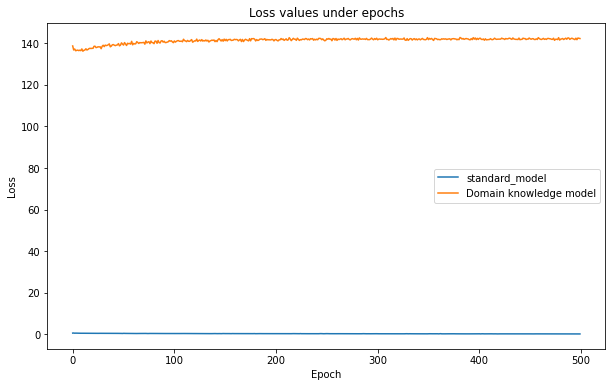

In [21]:
%matplotlib inline

plt.figure(figsize=(10,6))

plt.xlabel("Epoch")
plt.ylabel("Loss")
accuracy_list = []
accuracy_timeline= []
loss_list = []
for num, hist in enumerate(history):
    accuracy_list.append(np.mean(hist.history['accuracy']))
    loss_list.append(hist.history['loss'])
    accuracy_timeline.append(hist.history['accuracy'])
    
loss_history_standard = hist_standard_model.history['loss']
average_standard_model_training_accuracy = np.mean(hist_standard_model.history['accuracy'])
print(f'Average standard model training accuracy: {average_standard_model_training_accuracy}')
plt.plot(loss_history_standard, label='standard_model')

for num, loss in enumerate(loss_list):
    plt.plot(loss, label = 'Domain knowledge model')
    print(f'Average training accuracy with a constraint constant of %s: {accuracy_list[num]}' % (constraints_constants[num]))

plt.title("Loss values under epochs")
plt.legend()
plt.show()

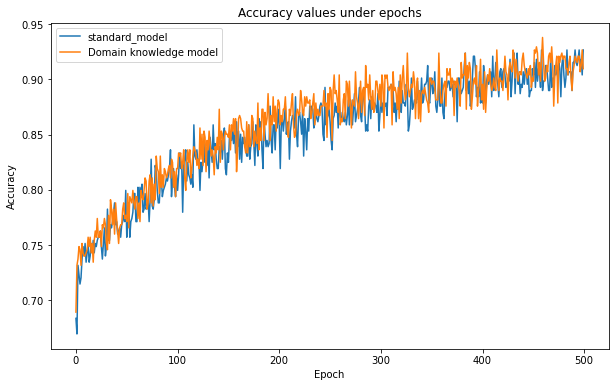

In [22]:
%matplotlib inline

plt.figure(figsize=(10,6))

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

accuracy_history_standard = hist_standard_model.history['accuracy']
plt.plot(accuracy_history_standard, label='standard_model')

for num, acc in enumerate(accuracy_timeline):
    plt.plot(acc, label = 'Domain knowledge model')

plt.title("Accuracy values under epochs")
plt.legend()
plt.show()

# 3. Test
<br>
<div style="text-align: justify;">
The models created and trained before will be tested on a test data set in this step. The test consists of precision-recall, f1 and accuracy score. In addition, a confusion matrix presents a better look to the performance of the corresponding model, as the misclassification numbers can be observed for the binary classification task. The confusion matrix is showed as a matrix first and also as a square out of four blocks for a better visualization. However, the matrix representation yields a better view, because the data quantity in the test data set is low and therefore, the difference between colours in the visualization are difficult to recognize.
</div>

In [23]:
def pred(model, x, y):
    
    """
    Prediction of a given model on the test data set.
    
    Args:
        model: the given NN model
        x: test dataset
        y: true labels of the test dataset
    
    Returns:
        binary_predictions: the predictions in binary form for a binary classification task
    """
    
    Y_pred = model.predict(x)
    # Converting the model's predictions to binary class labels (0 or 1)
    binary_predictions = (Y_pred > 0.5).astype(int)
    
    # Calculate accuracy
    accuracy = (binary_predictions == y).mean()
    print(f"Accuracy: {accuracy * 100:.5f}%")
    
    # Calculate other scores
    print(classification_report(y, binary_predictions))
    return binary_predictions

In [24]:
# Calling the pred function and attending the results into predictions list for the given domain knowledge models.
predictions= []
for num, model in enumerate(DK_models):
    predictions.append(pred(model, X_test, y_test))

Accuracy: 94.94949%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.95      0.82      0.88        22

    accuracy                           0.95        99
   macro avg       0.95      0.90      0.92        99
weighted avg       0.95      0.95      0.95        99



In [25]:
# Calling the pred function for the standard model
pred(standard_model, X_test, y_test)

Accuracy: 92.92929%
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.83      0.86      0.84        22

    accuracy                           0.93        99
   macro avg       0.89      0.91      0.90        99
weighted avg       0.93      0.93      0.93        99



array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [26]:
# Defining a list for saving the confusion matrix results for the models
mcm_list = []
def confusion (ind):
    mcm_list.append(confusion_matrix(y_test, predictions[ind]))
    return

In [27]:
# Confusion matrix results of the domain knowledge model(s)
for ind, model in enumerate(DK_models):
    confusion(ind)
    print(mcm_list[ind])

[[76  1]
 [ 4 18]]


In [28]:
# Confusion matrix results of the standard model
mcm_standard = confusion_matrix(y_test,  (standard_model.predict(X_test) > 0.5).astype(int))
print(mcm_standard)

[[73  4]
 [ 3 19]]


In [29]:
def confusion_visualization (ind, mcm):
    """
    Function for visualizing the confusion matrix result of the given model
    
    Args:
        ind: the index of the model in the DK_models list
        mcm: the confusion matrix result of the corresponding model
        
    Returns:
        Visualized confusion matrix
    """
    
    Classes= ['Use as is', 'Scrap']
    plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(Classes))
    plt.xticks(tick_marks, Classes, rotation=45)
    plt.yticks(tick_marks, Classes)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title(f'Confusion matrix of the domain knowledge model %s with a constraint constant %s: ' % (ind+1 ,constraints_constants[ind]))
    plt.show()

For-loop for calling the function above for visualizing the confusion matrix of the corresponding domain knowledge model 
in the DK_models list. For the given case, there is only one model in the list.

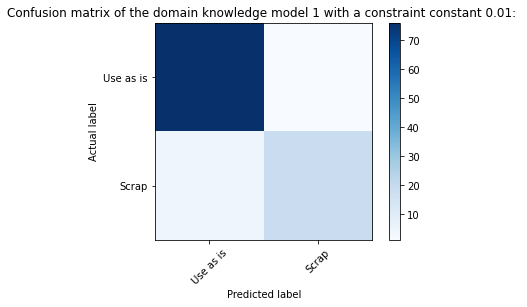

In [30]:
for ind, mcm in enumerate(mcm_list):
    confusion_visualization(ind, mcm)

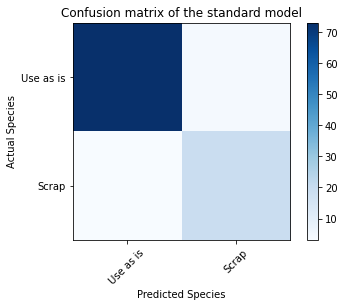

In [31]:
"Visualizing the confusiton matrix result of the standard model"

Classes= ['Use as is', 'Scrap']
plt.imshow(mcm_standard, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(Classes))
plt.xticks(tick_marks, Classes, rotation=45)
plt.yticks(tick_marks, Classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title('Confusion matrix of the standard model')
plt.show()